In [1]:
COMPETITION_NAME = 'playground-series-s3e3'

!pip install -qq fastai
!pip install -qq kaggle

from fastai.imports import *
np.set_printoptions(linewidth=130)

iskaggle = os.environ.get('KAGGLE_KERNEL_RUN_TYPE', '')

# get competition data
if iskaggle:
    path = Path('../input/'+COMPETITION_NAME)
else:
    DOWNLOADS = Path('downloads')
    import zipfile,kaggle
    path = DOWNLOADS / COMPETITION_NAME
    if not path.is_dir():
        kaggle.api.competition_download_cli(COMPETITION_NAME, path=DOWNLOADS)
        zipfile.ZipFile(f'{path}.zip').extractall(path)
print('done')

100%|██████████| 95.2k/95.2k [00:00<00:00, 4.62MB/s]


done


### Explore the data

In [3]:
!ls {path}

sample_submission.csv  test.csv  train.csv


In [5]:
df = pd.read_csv(path/'train.csv')
df.head(3)

,id,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,0,36,Travel_Frequently,599,Research & Development,24,3,Medical,1,4,...,80,1,10,2,3,10,0,7,8,0
1,1,35,Travel_Rarely,921,Sales,8,3,Other,1,1,...,80,1,4,3,3,4,2,0,3,0
2,2,32,Travel_Rarely,718,Sales,26,3,Marketing,1,3,...,80,2,4,3,3,3,2,1,2,0


In [7]:
df.dtypes

id                           int64
Age                          int64
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYea

In [6]:
df.describe()

,id,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
count,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.0,1677.000000,1677.000000,1677.000000,1677.000000,...,1677.0,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000
mean,838.000000,36.036971,892.749553,8.683959,2.937984,1.0,2.757901,67.798450,2.782349,1.998807,...,80.0,0.721527,10.709600,2.732856,2.769827,6.806798,4.144305,1.978533,4.186643,0.119261
std,484.252517,8.507112,374.496259,7.826143,1.039078,0.0,1.086835,19.435928,0.650664,1.083065,...,0.0,0.771259,7.255135,1.145271,0.647721,5.883282,3.583398,3.045716,3.576189,0.324192
min,0.000000,18.000000,107.000000,1.000000,1.000000,1.0,1.000000,30.000000,1.000000,1.000000,...,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,419.000000,30.000000,589.000000,2.000000,2.000000,1.0,2.000000,51.000000,2.000000,1.000000,...,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,0.000000
50%,838.000000,35.000000,890.000000,7.000000,3.000000,1.0,3.000000,69.000000,3.000000,2.000000,...,80.0,1.000000,9.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,0.000000
75%,1257.000000,41.000000,1223.000000,12.000000,4.000000,1.0,4.000000,84.000000,3.000000,2.000000,...,80.0,1.000000,14.000000,3.000000,3.000000,9.000000,7.000000,2.000000,7.000000,0.000000
max,1676.000000,60.000000,3921.000000,29.000000,15.000000,1.0,4.000000,100.000000,4.000000,7.000000,...,80.0,3.000000,41.000000,6.000000,4.000000,41.000000,18.000000,15.000000,17.000000,1.000000


In [19]:
 df.isnull().sum().sum()

0

<AxesSubplot:>

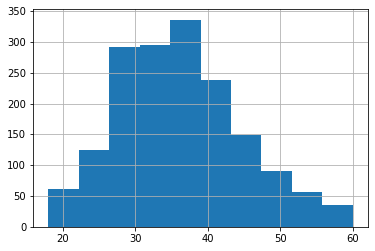

In [20]:
df.Age.hist()

### First fastai tabular model

In [30]:
from fastai.tabular.all import *

In [21]:
df.columns

Index(['id', 'Age', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition'],
      dtype='object')

In [27]:
df.Department.value_counts()

Research & Development    1167
Sales                      471
Human Resources             39
Name: Department, dtype: int64

In [28]:
cats = ['BusinessTravel', 'Department']
conts = ['Age', 'DailyRate']

In [31]:
dls = TabularDataLoaders.from_df(df, path=path, y_names="Attrition",
    cat_names = cats,
    cont_names = conts,
    procs = [Categorify, FillMissing, Normalize])

In [32]:
splits = RandomSplitter(valid_pct=0.2)(range_of(df))

In [35]:
dls.show_batch()

,BusinessTravel,Department,Age,DailyRate,Attrition
0,Travel_Frequently,Sales,34.0,535.000001,1.0
1,Travel_Rarely,Research & Development,28.0,745.999995,0.0
2,Travel_Rarely,Sales,29.0,227.999989,0.0
3,Travel_Rarely,Research & Development,28.0,437.999995,0.0
4,Travel_Rarely,Sales,32.0,1156.999999,0.0
5,Travel_Rarely,Research & Development,35.0,1373.000002,0.0
6,Travel_Rarely,Sales,45.0,827.000002,0.0
7,Travel_Rarely,Research & Development,38.0,771.999996,0.0
8,Travel_Rarely,Sales,27.0,1081.999995,0.0
9,Travel_Rarely,Sales,31.0,1485.000003,0.0


In [36]:
learn = tabular_learner(dls, metrics=accuracy)

SuggestedLRs(minimum=0.006918309628963471, steep=9.120108734350652e-05, valley=0.0006918309954926372)

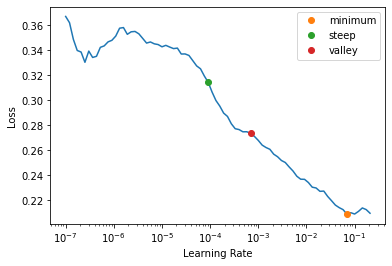

In [38]:
learn.lr_find(suggest_funcs=(minimum, steep, valley))

In [40]:
learn.fit_one_cycle(10, 1e-3)

epoch,train_loss,valid_loss,accuracy,time
0,0.099408,0.098085,0.889552,00:00
1,0.106007,0.117358,0.889552,00:00
2,0.112623,0.108734,0.889552,00:00
3,0.112931,0.113940,0.889552,00:00
4,0.109575,0.107487,0.889552,00:00
5,0.109838,0.099449,0.889552,00:00
6,0.107089,0.100223,0.889552,00:00
7,0.105097,0.099337,0.889552,00:00
8,0.104136,0.099136,0.889552,00:00
9,0.103104,0.099320,0.889552,00:00


In [55]:
learn.show_results()

,BusinessTravel,Department,Age,DailyRate,Attrition,Attrition_pred
0,2.0,2.0,-0.605933,-2.078534,0.0,0.202612
1,3.0,3.0,-0.840815,0.825089,0.0,0.134665
2,2.0,2.0,0.333596,-0.124069,1.0,0.127741
3,3.0,1.0,0.216155,-0.116048,0.0,0.099313
4,3.0,3.0,-0.488492,-0.506407,0.0,0.203330
5,3.0,2.0,0.333596,-0.629396,0.0,0.056777
6,3.0,3.0,-0.605933,-1.206913,0.0,0.231152
7,3.0,3.0,-1.075697,-1.287123,0.0,0.329405
8,3.0,3.0,-1.310580,0.255594,0.0,0.164847


### predictions for test data

In [44]:
test_df = pd.read_csv(path/'test.csv')
test_df.head(2)

,id,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1677,19,Non-Travel,992,Research & Development,1,1,Medical,1,4,...,4,80,0,1,2,2,1,0,0,0
1,1678,45,Travel_Rarely,1136,Sales,4,4,Marketing,1,3,...,3,80,1,7,3,3,2,2,2,2


In [45]:
test_dl = dls.test_dl(test_df)
preds, _, decoded = learn.get_preds(dl=test_dl, with_decoded=True)

In [46]:
decoded.shape

torch.Size([1119, 1])

In [50]:
decoded[:10].flatten()

tensor([0.0985, 0.0572, 0.0263, 0.1202, 0.2569, 0.1017, 0.1017, 0.0876, 0.0607,
        0.1670])

In [47]:
decoded.float().mean()

tensor(0.1238)

### Submission

In [51]:
submission = pd.read_csv(path/'sample_submission.csv')
submission.shape

(1119, 2)

In [52]:
submission.head()

,id,Attrition
0,1677,0.119261
1,1678,0.119261
2,1679,0.119261
3,1680,0.119261
4,1681,0.119261


In [54]:
submission.Attrition = decoded
submission.head()

,id,Attrition
0,1677,0.098463
1,1678,0.057162
2,1679,0.026253
3,1680,0.120218
4,1681,0.256875


### send submission to Kaggle!

In [56]:
# write submission csv
technique = 'fastai-tabular-learner-v1'
sub_filename = Path('subs')/(COMPETITION_NAME+'-'+technique+'-sub.csv')
submission.to_csv(sub_filename, index=False)

if not iskaggle:
    print('about to submit', sub_filename, 'to kaggle')
    input('continue?')
    ret = kaggle.api.competition_submit(sub_filename, technique, COMPETITION_NAME)
    print(ret)

about to submit subs/playground-series-s3e3-fastai-tabular-learner-v1-sub.csv to kaggle


continue? 


100%|██████████| 17.7k/17.7k [00:00<00:00, 40.8kB/s]


Successfully submitted to Playground Series Season 3, Episode 3
